# CNN using PyTorch

We import the necessary libraries and packages 

In [3]:
from torch.utils.data import Dataset, DataLoader

from torchvision import transforms
import torch 
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.models as models
import torchvision.datasets as dsets
torch.manual_seed(0)

from matplotlib.pyplot import imshow
import matplotlib.pylab as plt

from PIL import Image

We will load the Fashion-MNIST

In [4]:
img_size = 16

composed = transforms.Compose([transforms.Resize((img_size, img_size)), transforms.ToTensor()])

dataset_train = dsets.FashionMNIST(root='.fashion/data', train=True, download=True, transform=composed)
dataset_val = dsets.FashionMNIST(root='.fashion/data', train=False, download=True, transform=composed)

Extracting .fashion/data/FashionMNIST/raw/train-images-idx3-ubyte.gz to .fashion/data/FashionMNIST/raw


Extracting .fashion/data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to .fashion/data/FashionMNIST/raw



Extracting .fashion/data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to .fashion/data/FashionMNIST/raw


Extracting .fashion/data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to .fashion/data/FashionMNIST/raw
Processing...
Done!


/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:469: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:141.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


We take a look at the data to make sure everything looks ok

In [5]:
def img_show(data_sample):
    plt.imshow(data_sample[0].numpy().reshape(img_size, img_size), cmap='gray')
    plt.title('y = '+ str(data_sample[1]))

Training set:

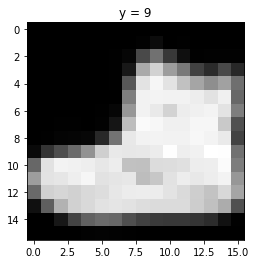

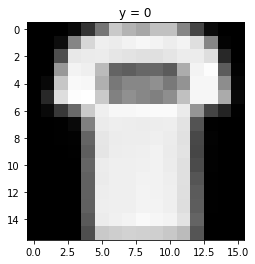

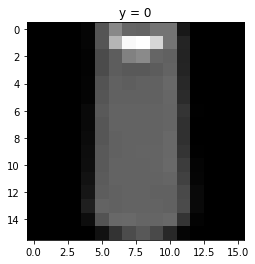

In [6]:
for n,data_sample in enumerate(dataset_train):

    img_show(data_sample)
    plt.show()
    if n==2:
        break 

Validation set:

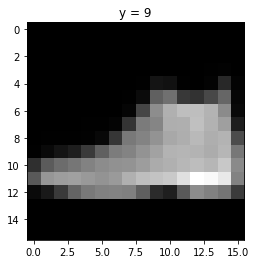

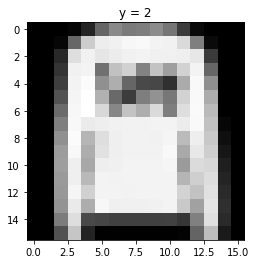

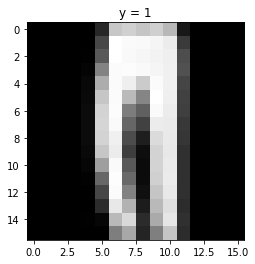

In [7]:
for n,data_sample in enumerate(dataset_val):

    img_show(data_sample)
    plt.show()
    if n==2:
        break 

We load the data into the DataLoader

In [8]:
train_loader = torch.utils.data.DataLoader(dataset=dataset_train, batch_size=100 )
test_loader = torch.utils.data.DataLoader(dataset=dataset_val, batch_size=100 )

## Simple CNN

We can now start building a simple CNN 

In [19]:
class CNN(nn.Module):
    
    # Contructor
    def __init__(self, out_1=16, out_2=32,number_of_classes=10):
        super(CNN, self).__init__()
        # First convl. layer + a maxpool layer
        self.cnn1 = nn.Conv2d(in_channels=1, out_channels=out_1, kernel_size=5, padding=2)
        self.maxpool1=nn.MaxPool2d(kernel_size=2)

        # Second convl. layer + a maxpool layer
        self.cnn2 = nn.Conv2d(in_channels=out_1, out_channels=out_2, kernel_size=5, stride=1, padding=2)
        self.maxpool2=nn.MaxPool2d(kernel_size=2)
        
        #Final linear layer
        self.fc1 = nn.Linear(out_2 * 4 * 4, number_of_classes)
    
    # Prediction
    def forward(self, x):
        x = self.cnn1(x)
        x = torch.relu(x)
        x = self.maxpool1(x)
        x = self.cnn2(x)
        x = torch.relu(x)
        x = self.maxpool2(x)
        x = x.view(x.size(0), -1)
        x = self.fc1(x)
        return x

We can now define the model, the loos criterion and the optimizer to be used for the learning

In [20]:
model = CNN(out_1=16, out_2=32,number_of_classes=10)
criterion = nn.CrossEntropyLoss()
learning_rate = 0.1
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate) #Stochstic gradient decent 

And train the model

In [21]:
import time
start_time = time.time()

cost_list=[]
accuracy_list=[]
N_test=len(dataset_val)
n_epochs=10
for epoch in range(n_epochs):
    cost=0
    # Put the arch. in train mode
    model.train()

    # Loop over training data set
    for x, y in train_loader:

        # Zero out the gradients
        optimizer.zero_grad()

        # Pass the batch to the architecture 
        z = model(x)

        # Calculate the loss to reproduce the
        # input at the output.
        loss = criterion(z, y)

        # Backpropagation 
        loss.backward()

        # Update the network weights
        optimizer.step()

        # Add to the running loss
        cost+=loss.item()

    correct=0
    #perform a prediction on the validation  data 

    # Set the model to evaluation mode
    model.eval()

    # Loop over validation data
    for x_test, y_test in test_loader:
        z = model(x_test)
        _, yhat = torch.max(z.data, 1)
        correct += (yhat == y_test).sum().item()
    accuracy = correct / N_test
    accuracy_list.append(accuracy)
    cost_list.append(cost)

We can now plot the Cost and accuracy

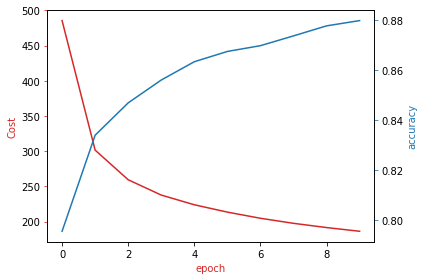

In [22]:
fig, ax1 = plt.subplots()
color = 'tab:red'
ax1.plot(cost_list, color=color)
ax1.set_xlabel('epoch', color=color)
ax1.set_ylabel('Cost', color=color)
ax1.tick_params(axis='y', color=color)
    
ax2 = ax1.twinx()  
color = 'tab:blue'
ax2.set_ylabel('accuracy', color=color) 
ax2.set_xlabel('epoch', color=color)
ax2.plot( accuracy_list, color=color)
ax2.tick_params(axis='y', color=color)
fig.tight_layout()

Next we try the Adam optimizer

In [37]:
model = CNN(out_1=16, out_2=32,number_of_classes=10)
criterion = nn.CrossEntropyLoss()
learning_rate = 0.001
optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate, weight_decay=1e-8) #Adam

And train again

In [38]:
cost_list=[]
accuracy_list=[]
N_test=len(dataset_val)
n_epochs=10
for epoch in range(n_epochs):
    cost=0
    # Put the arch. in train mode
    model.train()

    # Loop over training data set
    for x, y in train_loader:

        # Zero out the gradients
        optimizer.zero_grad()

        # Pass the batch to the architecture 
        z = model(x)

        # Calculate the loss to reproduce the
        # input at the output.
        loss = criterion(z, y)

        # Backpropagation 
        loss.backward()

        # Update the network weights
        optimizer.step()

        # Add to the running loss
        cost+=loss.item()

    correct=0
    #perform a prediction on the validation  data 

    # Set the model to evaluation mode
    model.eval()

    # Loop over validation data
    for x_test, y_test in test_loader:
        z = model(x_test)
        _, yhat = torch.max(z.data, 1)
        correct += (yhat == y_test).sum().item()
    accuracy = correct / N_test
    accuracy_list.append(accuracy)
    cost_list.append(cost)

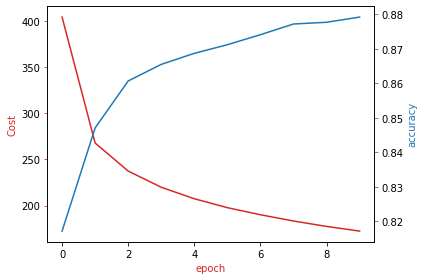

In [41]:
fig, ax1 = plt.subplots()
color = 'tab:red'
ax1.plot(cost_list, color=color)
ax1.set_xlabel('epoch', color=color)
ax1.set_ylabel('Cost', color=color)
ax1.tick_params(axis='y', color=color)
    
ax2 = ax1.twinx()  
color = 'tab:blue'
ax2.set_ylabel('accuracy', color=color) 
ax2.set_xlabel('epoch', color=color)
ax2.plot( accuracy_list, color=color)
ax2.tick_params(axis='y', color=color)
fig.tight_layout()

## Batch Norm CNN

An alternative is to apply batch normalization.

In [44]:
class CNN_batch(nn.Module):
    def __init__(self, out_1=16, out_2=32,number_of_classes=10):

        super(CNN_batch, self).__init__()
        
        self.architecture = nn.Sequential(
            nn.Conv2d(in_channels=1, out_channels=out_1, kernel_size=5, padding=2),
            nn.BatchNorm2d(out_1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2),
            nn.Conv2d(in_channels=out_1, out_channels=out_2, kernel_size=5, stride=1, padding=2),
            nn.BatchNorm2d(out_2),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2),
            nn.Flatten(),
            nn.Linear(out_2 * 4 * 4, number_of_classes),
            nn.BatchNorm1d(10)
        )

    def forward(self, x):
        x = self.architecture(x)
        return x

In [45]:
model = CNN_batch(out_1=16, out_2=32,number_of_classes=10)
criterion = nn.CrossEntropyLoss()
learning_rate = 0.001
optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate, weight_decay=1e-8) #Adam

In [46]:
cost_list=[]
accuracy_list=[]
N_test=len(dataset_val)
n_epochs=10
for epoch in range(n_epochs):
    cost=0
    # Put the arch. in train mode
    model.train()

    # Loop over training data set
    for x, y in train_loader:

        # Zero out the gradients
        optimizer.zero_grad()

        # Pass the batch to the architecture 
        z = model(x)

        # Calculate the loss to reproduce the
        # input at the output.
        loss = criterion(z, y)

        # Backpropagation 
        loss.backward()

        # Update the network weights
        optimizer.step()

        # Add to the running loss
        cost+=loss.item()

    correct=0
    #perform a prediction on the validation  data 

    # Set the model to evaluation mode
    model.eval()

    # Loop over validation data
    for x_test, y_test in test_loader:
        z = model(x_test)
        _, yhat = torch.max(z.data, 1)
        correct += (yhat == y_test).sum().item()
    accuracy = correct / N_test
    accuracy_list.append(accuracy)
    cost_list.append(cost)

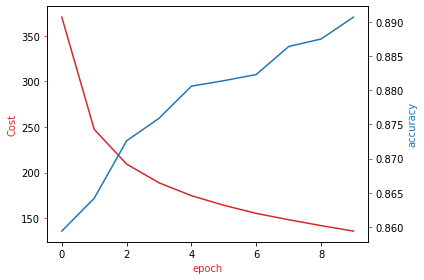

In [47]:
fig, ax1 = plt.subplots()
color = 'tab:red'
ax1.plot(cost_list, color=color)
ax1.set_xlabel('epoch', color=color)
ax1.set_ylabel('Cost', color=color)
ax1.tick_params(axis='y', color=color)
    
ax2 = ax1.twinx()  
color = 'tab:blue'
ax2.set_ylabel('accuracy', color=color) 
ax2.set_xlabel('epoch', color=color)
ax2.plot( accuracy_list, color=color)
ax2.tick_params(axis='y', color=color)
fig.tight_layout()

## Now we try deeper CNN such as Resnet18

In [9]:
model=models.resnet18(pretrained=False)
num_ftrs = model.fc.in_features

model.fc = nn.Linear(num_ftrs, 10) #set the output
model.conv1 = torch.nn.Conv2d(1, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False) #Modify resnet for grayscale

model = model.cuda()

preprocess = transforms.Compose([
    transforms.Resize(224),
    transforms.ToTensor()
])

dataset_train_p = dsets.FashionMNIST(root='.fashion/data', train=True, download=True, transform=preprocess)
dataset_val_p = dsets.FashionMNIST(root='.fashion/data', train=False, download=True, transform=preprocess)

train_loader_p = torch.utils.data.DataLoader(dataset=dataset_train_p, batch_size=100 )
test_loader_p = torch.utils.data.DataLoader(dataset=dataset_val_p, batch_size=100 )

print(torch.cuda.get_device_name())

Tesla P100-PCIE-16GB


And then as before we define the loss and the optimizer

In [10]:
criterion = nn.CrossEntropyLoss()
learning_rate = 0.001
optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate, weight_decay=1e-8) #Adam

In [13]:
cost_list=[]
accuracy_list=[]
N_test=len(dataset_val_p)
n_epochs=10
for epoch in range(n_epochs):
    cost=0
    # Put the arch. in train mode
    model.train()

    # Loop over training data set
    for x, y in train_loader_p:

        #move on the GPU
        x  = x.to('cuda:0')
        y = y.to('cuda:0')

        # Zero out the gradients
        optimizer.zero_grad()

        # Pass the batch to the architecture 
        z = model(x)

        # Calculate the loss to reproduce the
        # input at the output.
        loss = criterion(z, y)

        # Backpropagation 
        loss.backward()

        # Update the network weights
        optimizer.step()

        # Add to the running loss
        cost+=loss.item()

    correct=0
    #perform a prediction on the validation  data 

    # Set the model to evaluation mode
    model.eval()

    # Loop over validation data
    for x_test, y_test in test_loader_p:
        x_test  = x_test.to('cuda:0')
        y_test = y_test.to('cuda:0')
        z = model(x_test)
        _, yhat = torch.max(z.data, 1)
        correct += (yhat == y_test).sum().to('cpu').item()
    accuracy = correct / N_test
    accuracy_list.append(accuracy)
    cost_list.append(cost)

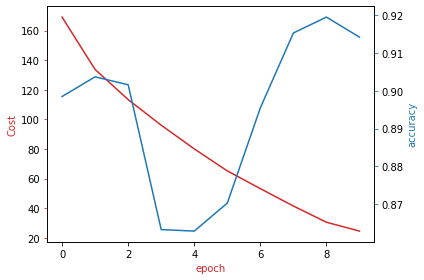

In [14]:
fig, ax1 = plt.subplots()
color = 'tab:red'
ax1.plot(cost_list, color=color)
ax1.set_xlabel('epoch', color=color)
ax1.set_ylabel('Cost', color=color)
ax1.tick_params(axis='y', color=color)
    
ax2 = ax1.twinx()  
color = 'tab:blue'
ax2.set_ylabel('accuracy', color=color) 
ax2.set_xlabel('epoch', color=color)
ax2.plot( accuracy_list, color=color)
ax2.tick_params(axis='y', color=color)
fig.tight_layout()